In [51]:
# Initial imports
import pandas as pd
from path import Path
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# We will start importing the 25M MovieLens Dataset which has been downloaded from https:/grouplens.org/movielens
# The first file is the list of movies
file_path = Path('movies.csv')
movies_df = pd.read_csv(file_path)
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# We see that there are ~62k movies in this dataframe.  
movies_df.movieId.count()

62423

In [12]:
# Now lets import the movie ratings file
file_path2 = Path('ratings.csv')
ratings_df = pd.read_csv(file_path2)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [22]:
# Let's see if how many movies are left if we only recommend movies with an average rating greater 4.5 or 5.
# Note the ratings are in increments of .5
goodratings_df=ratings_df.groupby('movieId').mean('rating').reset_index()
goodratings_df.head()

,movieId,userId,rating,timestamp
0,1,81015.621237,4.858535,1.151405e+09
1,2,82284.123360,4.853768,1.132837e+09
2,3,81127.447120,4.946690,9.340514e+08
3,4,78683.571429,4.969780,9.145871e+08
4,5,82821.008264,4.933884,9.984716e+08


In [23]:
# Now we see we are we left ~33k movies
goodratings_df.shape

(32599, 4)

In [30]:
# Let's put make a list of movieIds that are in this good average rating catagory.
goodmovies=goodratings_df.movieId.unique()

In [31]:
goodmovies

array([     1,      2,      3, ..., 209133, 209155, 209163], dtype=int64)

In [42]:
# Let's now create a shorter movie dataframe with only the good movies remaining
movies_dfshort=movies_df.loc[movies_df['movieId'].isin(goodmovies)]
movies_dfshort.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [32]:
# Now let's import the genome-score file which has  ~1k tags with each movie's relevanance score to that tag
file_path5 = Path('genome-scores.csv')
genomescores_df = pd.read_csv(file_path5)
genomescores_df.head(5)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [34]:
# This dataframe is rather large since it has tagIds and the relevant match each original 62k movies in the dataset
genomescores_df.shape

(15584448, 3)

In [36]:
# But we can reduce this dataset some to only include our "good movies"
genomescores_dfshort=genomescores_df.loc[genomescores_df['movieId'].isin(goodmovies)]
genomescores_dfshort.shape

(15512256, 3)

In [40]:
# By importing the genome-tags file we can see what text is represented by the tagId
file_path4 = Path('genome-tags.csv')
genometags_df = pd.read_csv(file_path4)
genometags_df.head(10)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
9,10,19th century


In [48]:
# Now lets combine the shorter list of good movies with their genome scoring as a dataframe
df=pd.merge(movies_dfshort,genomescores_dfshort,on='movieId', how='left')
df.head()

,movieId,title,genres,tagId,relevance
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,0.02875
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,0.02375
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,0.06250
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,0.07575
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,0.14075


In [59]:
# check the size of our new dataframe
df.shape

(15531103, 5)

In [49]:
# Lets see how well this genome scoring seems to find relevant movies by examining tagId 1 which represent texts '007'
check1_df=df.loc[(df['tagId']==1) & (df['relevance']>.95)]
check1_df.head(20)

,movieId,title,genres,tagId,relevance
10152,10,GoldenEye (1995),Action|Adventure|Thriller,1.0,0.99950
1725949,1722,Tomorrow Never Dies (1997),Action|Adventure|Thriller,1.0,0.99975
2381347,2376,"View to a Kill, A (1985)",Action|Adventure|Thriller,1.0,0.99975
2985977,2947,Goldfinger (1964),Action|Adventure|Thriller,1.0,0.99950
2987105,2948,From Russia with Love (1963),Action|Adventure|Thriller,1.0,0.99975
2988233,2949,Dr. No (1962),Action|Adventure|Thriller,1.0,0.99975
3020948,2983,"Ipcress File, The (1965)",Thriller,1.0,0.97025
3027716,2989,For Your Eyes Only (1981),Action|Adventure|Thriller,1.0,0.99975
3028844,2990,Licence to Kill (1989),Action|Adventure|Thriller,1.0,0.99950
3029972,2991,Live and Let Die (1973),Action|Adventure|Thriller,1.0,0.99975


In [50]:
# Lets see how well this genome scoring seems to find relevant movies by examining tagId 45 which represent texts 'aliens'
check2_df=df.loc[(df['tagId']==43) & (df['relevance']>.95)]
check2_df.head(20)

,movieId,title,genres,tagId,relevance
209857,196,Species (1995),Horror|Sci-Fi,43.0,0.99950
340707,316,Stargate (1994),Action|Adventure|Sci-Fi,43.0,0.96025
456896,426,Body Snatchers (1993),Horror|Sci-Fi|Thriller,43.0,0.96475
467048,435,Coneheads (1993),Comedy|Sci-Fi,43.0,0.99225
553904,512,"Puppet Masters, The (1994)",Horror|Sci-Fi,43.0,0.99850
770505,748,"Arrival, The (1996)",Action|Sci-Fi|Thriller,43.0,0.99800
797585,780,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller,43.0,0.99825
1121338,1097,E.T. the Extra-Terrestrial (1982),Children|Drama|Sci-Fi,43.0,0.99450
1147288,1127,"Abyss, The (1989)",Action|Adventure|Sci-Fi|Thriller,43.0,0.99650
1214978,1200,Aliens (1986),Action|Adventure|Horror|Sci-Fi,43.0,0.99950


In [60]:
# Let's merge in our actual genome tags for ease of interpretation
dfplots=pd.merge(df,genometags_df,on='tagId', how='left')
dfplots.head()

,movieId,title,genres,tagId,relevance,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,0.02875,007
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,0.02375,007 (series)
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,0.06250,18th century
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,0.07575,1920s
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,0.14075,1930s


In [82]:
goldeneye_df=dfplots.loc[df['movieId']==10]
goldeneye_df.rename(columns={'relevance':'goldeneye_rel'},inplace=True)
goldeneye_df.drop(columns=['movieId','title','genres'],inplace=True)
goldeneye_df.head()

C:\Users\jj277\anaconda3\envs\PythonDataJJ\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\jj277\anaconda3\envs\PythonDataJJ\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,tagId,goldeneye_rel,tag
10152,1.0,0.99950,007
10153,2.0,1.00000,007 (series)
10154,3.0,0.02700,18th century
10155,4.0,0.06050,1920s
10156,5.0,0.07875,1930s


In [83]:
tomorneverdies_df=dfplots.loc[df['movieId']==1722]
tomorneverdies_df.rename(columns={'relevance':'tomorneverdies_rel'},inplace=True)
tomorneverdies_df.drop(columns=['movieId','title','genres'],inplace=True)
tomorneverdies_df.head()

C:\Users\jj277\anaconda3\envs\PythonDataJJ\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\jj277\anaconda3\envs\PythonDataJJ\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,tagId,tomorneverdies_rel,tag
1725949,1.0,0.99975,007
1725950,2.0,1.00000,007 (series)
1725951,3.0,0.04025,18th century
1725952,4.0,0.05700,1920s
1725953,5.0,0.08025,1930s


In [85]:
correl_df=pd.merge(tomorneverdies_df,goldeneye_df,on='tagId')
correl_df.head()

,tagId,tomorneverdies_rel,tag_x,goldeneye_rel,tag_y
0,1.0,0.99975,007,0.99950,007
1,2.0,1.00000,007 (series),1.00000,007 (series)
2,3.0,0.04025,18th century,0.02700,18th century
3,4.0,0.05700,1920s,0.06050,1920s
4,5.0,0.08025,1930s,0.07875,1930s


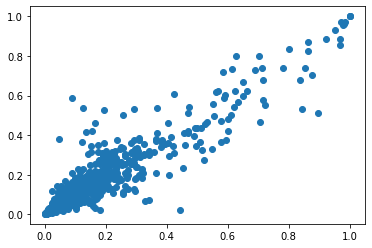

In [86]:
# now lets look at correlation of the tags for movies we know are similar 10 and 1722 which 
# are Goldeneye and Tomorrow Never Dies
x_axis=correl_df.tomorneverdies_rel
y_axis=correl_df.goldeneye_rel
plt.scatter(x_axis,y_axis)